In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; 
sns.set()

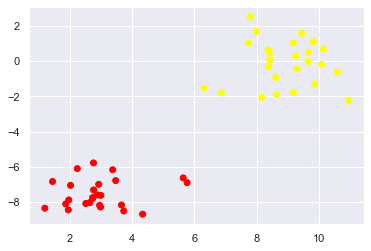

In [20]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=1000
                  , cluster_std=1)
plt.scatter(X[:, 0], X[:, 1],c=y, cmap='autumn');

ax AxesSubplot(0.125,0.125;0.775x0.755)
xlim (0.7065916993165304, 11.453709761452728)
ylim (-9.264104545001377, 3.0830932833073557)


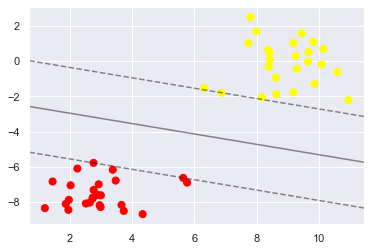

In [25]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=False):
    if ax is None:
        ax = plt.gca()
    print("ax",ax)
    xlim = ax.get_xlim()
    print("xlim",xlim)
    ylim = ax.get_ylim()
    print("ylim",ylim)
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [42]:
model.support_vectors_

array([[ 0.21219196,  1.74387328],
       [-1.23229972,  3.89519459],
       [-3.13375771,  1.55028992]])

ax AxesSubplot(0.0625,0.125;0.422619x0.755)
xlim (-1.0, 4.0)
ylim (-1.0, 6.0)


Text(0.5, 1.0, 'N = 60')

ax AxesSubplot(0.527381,0.125;0.422619x0.755)
xlim (-1.0, 4.0)
ylim (-1.0, 6.0)


Text(0.5, 1.0, 'N = 120')

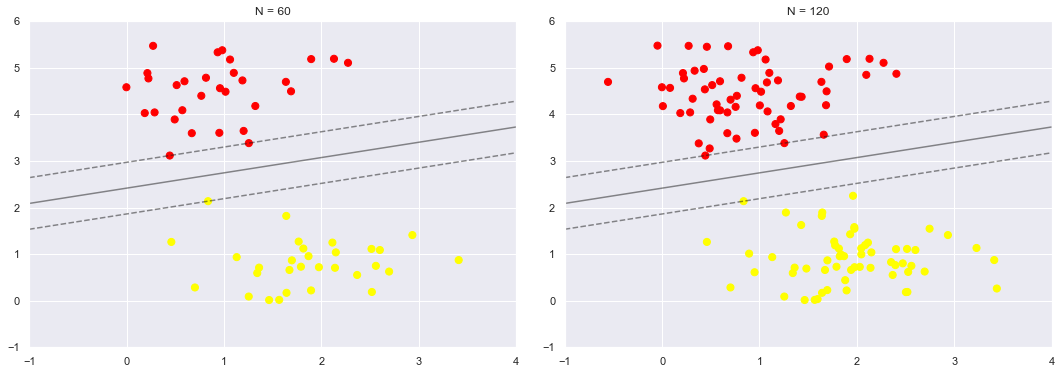

In [43]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


ax AxesSubplot(0.125,0.125;0.775x0.755)
xlim (0.7065916993165304, 11.453709761452728)
ylim (-9.264104545001377, 3.0830932833073557)


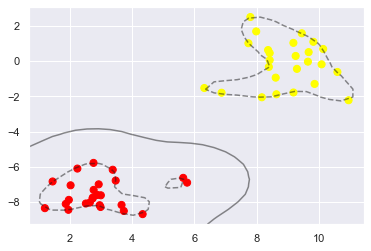

In [26]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
